In [358]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot

In [359]:
rbiData = pd.read_csv('INR=X.csv', index_col='Date', parse_dates=True)
rbiData = rbiData['Adj Close']
rbiData = rbiData.dropna()
rbiData.head()

Date
2003-12-01    45.709999
2003-12-02    45.629002
2003-12-03    45.549999
2003-12-04    45.548000
2003-12-05    45.449001
Name: Adj Close, dtype: float64

Plotting the time series chart of USD/INR vs Time

(4722,)


<AxesSubplot:xlabel='Date'>

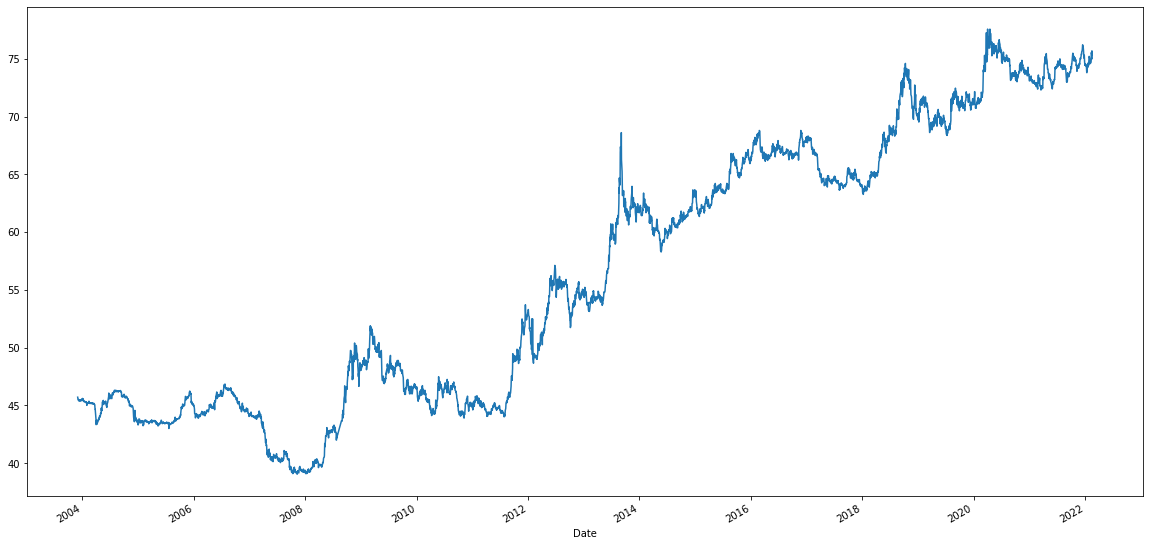

In [360]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

print(rbiData.shape)
rbiData.plot()

Autocorrelation Test (Durbin Watson)

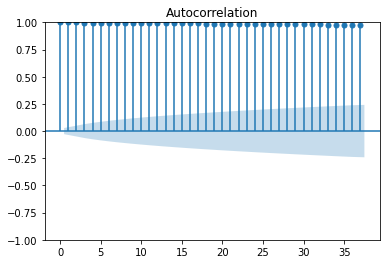

In [361]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(rbiData)
pyplot.show()

In [362]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

model1 = sm.OLS(rbiData, np.ones(len(rbiData))).fit()
autoCorr = durbin_watson(model1.resid)
print('DW Autocorrelation: ', autoCorr)

if autoCorr == 2:
    print('No autocorrelation')
elif autoCorr > 0 and autoCorr < 2:
    print('Positive Autocorrelation')
elif autoCorr > 2 and autoCorr < 4:
    print('Negative Autocorrelation')  

DW Autocorrelation:  0.0006085668032764551
Positive Autocorrelation


Augmented Dickey Fuller Test Function

In [363]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(data):
    ST = adfuller(data, autolag = 'AIC')
    print('ADF: ', ST[0])
    print('P-value: ', ST[1])
    print('No. of Lags: ', ST[2])
    print('No. of observations used: ', ST[3])
    print('Critical Values: ')
    for item, value in ST[4].items():
        print('\t', item, ': ', value)
    
    return ST[1]

Stationarity Test (ADF)

In [364]:
print('ADF Test for dataset\n')
Stationarity_res = ADF_test(rbiData)

if Stationarity_res > 0.05 :
    print('\nThe given dataset does not reject H0 hypothesis, hence is non-stationary.')
else:
    print('\nThe given dataset rejects H0 hypothesis, hence is stationary.')

ADF Test for dataset

ADF:  -0.26037265358325135
P-value:  0.9309322562612624
No. of Lags:  25
No. of observations used:  4696
Critical Values: 
	 1% :  -3.431743287507139
	 5% :  -2.862155673644394
	 10% :  -2.5670977253340403

The given dataset does not reject H0 hypothesis, hence is non-stationary.


In [365]:
print('ADF Test for 1st order diffrences of dataset\n')
diff_rbiData = rbiData.diff()
diff_rbiData = diff_rbiData.dropna()
Stationarity_res = ADF_test(diff_rbiData)

if Stationarity_res > 0.05 :
    print('\nThe given dataset does not reject H0 hypothesis, hence is non-stationary.')
else:
    print('\nThe given dataset rejects H0 hypothesis, hence is stationary.')

ADF Test for 1st order diffrences of dataset

ADF:  -13.58576109742634
P-value:  2.0819991879309097e-25
No. of Lags:  24
No. of observations used:  4696
Critical Values: 
	 1% :  -3.431743287507139
	 5% :  -2.862155673644394
	 10% :  -2.5670977253340403

The given dataset rejects H0 hypothesis, hence is stationary.


Seasonal Decompotion to obtain trend

<AxesSubplot:xlabel='Date'>

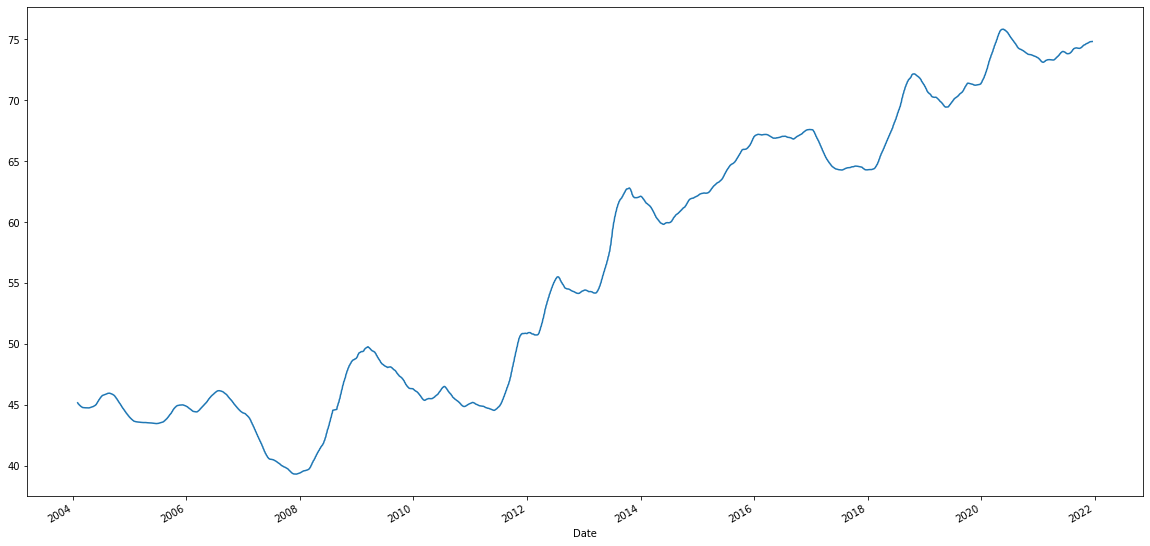

In [366]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

decomposedData = seasonal_decompose(rbiData, model='additive', period=90)
rbiData = decomposedData.trend
rbiData = rbiData.dropna()
rbiData.plot()

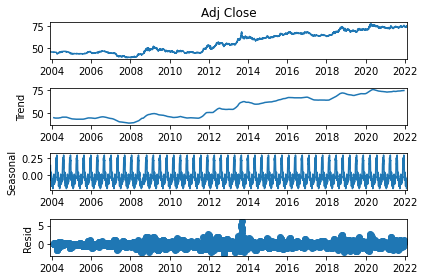

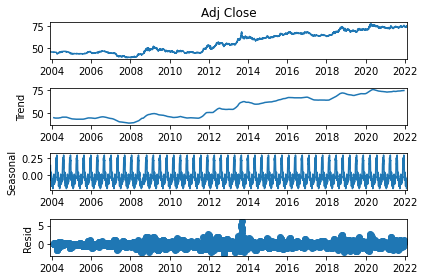

In [367]:
decomposedData.plot()

Obtain parameters of ARIMA model

In [368]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

AIC_result = auto_arima(rbiData, trace=True, suppress_warnings=True)
AIC_result.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-42987.631, Time=2.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-41040.199, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-41947.033, Time=0.41 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-42795.252, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-42987.511, Time=1.16 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-43039.589, Time=1.00 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-43027.078, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-42378.719, Time=0.69 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-42788.523, Time=0.70 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-42651.718, Time=0.49 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-41030.260, Time=0.78 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-43037.937, Time=2.80 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 10.904 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4632
Model:               SARIMAX(2, 2, 1)   Log Likelihood               21523.794
Date:                Fri, 18 Feb 2022   AIC                         -43039.589
Time:                        18:24:36   BIC                         -43013.828
Sample:                             0   HQIC                        -43030.525
                               - 4632                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1828      0.015    -12.032      0.000      -0.213      -0.153
ar.L2          0.0097      0.013      0.777      0.437      -0.015       0.034
ma.L1          0.8032      0.012     64.311      0.000       0.779       0.828
sigma2      5.348e-06   6.48e-08     82.535      0.000    5.22e-06    5.47e-06
===================================================================================
Ljung-Box (L1) (Q):                  62.72   Jarque-Bera (JB):              4137.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Model ARIMA(2,2,1)

In [369]:
from statsmodels.tsa.arima.model import ARIMA

train = rbiData.iloc[: -50]
test = rbiData.iloc[-50 :]
print(train.shape, test.shape)
print(train.head())

(4582,) (50,)
Date
2004-02-02    45.174533
2004-02-03    45.151517
2004-02-04    45.128350
2004-02-05    45.105061
2004-02-06    45.083122
Name: trend, dtype: float64


Training of ARIMA Model

In [370]:
model = ARIMA(train, order=(2,2,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trend   No. Observations:                 4582
Model:                 ARIMA(2, 2, 1)   Log Likelihood               21283.664
Date:                Fri, 18 Feb 2022   AIC                         -42559.328
Time:                        18:24:37   BIC                         -42533.610
Sample:                             0   HQIC                        -42550.274
                               - 4582                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1881      0.015    -12.325      0.000      -0.218      -0.158
ar.L2          0.0113      0.013      0.892      0.372      -0.013       0.036
ma.L1          0.8075      0.012     64.633      0.000       0.783       0.832
sigma2      5.381e-06   6.56e-08     81.970      0.000    5.25e-06    5.51e-06
===================================================================================
Ljung-Box (L1) (Q):                  63.39   Jarque-Bera (JB):              4103.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.82   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Testing of ARIMA Model

In [371]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start=start, end=end)
predictions.index = rbiData.index[start:end+1]
for num in range(len(predictions)):
    print('Pred: ', predictions[num], ' Actual: ', test[num])

Pred:  74.36108959557795  Actual:  74.36280451111112
Pred:  74.37446013345091  Actual:  74.37800336111113
Pred:  74.38783273394596  Actual:  74.39233276111112
Pred:  74.40120487652035  Actual:  74.40884607777778
Pred:  74.4145771284588  Actual:  74.42951334444446
Pred:  74.42794935466844  Actual:  74.45182338888891
Pred:  74.44132158694939  Actual:  74.47236006666668
Pred:  74.45469381779854  Actual:  74.49132060000004
Pred:  74.46806604898539  Actual:  74.50768501666668
Pred:  74.48143828009259  Actual:  74.52163282222224
Pred:  74.49481051121859  Actual:  74.53178174444446
Pred:  74.50818274234015  Actual:  74.54095732222223
Pred:  74.52155497346277  Actual:  74.55144566111112
Pred:  74.53492720458513  Actual:  74.55963789444445
Pred:  74.54829943570755  Actual:  74.56558513888889
Pred:  74.56167166682995  Actual:  74.5697268
Pred:  74.57504389795236  Actual:  74.57690682777779
Pred:  74.58841612907476  Actual:  74.58806961111112
Pred:  74.60178836019716  Actual:  74.6021268166667
Pr

<AxesSubplot:xlabel='Date'>

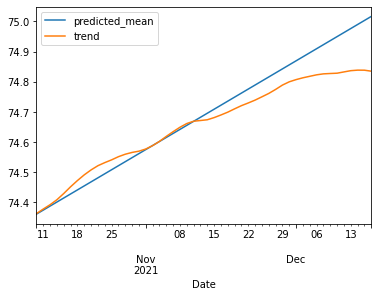

In [372]:
predictions.plot(legend=True)
test.plot(legend=True)

In [373]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mean_test = test.mean()
sq_mse = sqrt(mean_squared_error(predictions, test))
print('Mean: ', mean_test, ' and MSE: ', sq_mse)
print('Percentage error: ', 100*sq_mse/mean_test)

Mean:  74.65690474466668  and MSE:  0.06555904169750525
Percentage error:  0.08781376876221035


In [374]:
model2 = ARIMA(rbiData, order=(1,1,0))
result2 = model2.fit()
newPreds = result2.predict(start=len(rbiData), end=len(rbiData)+10).rename('ARIMA Predictions')
newPreds

4632    74.831572
4633    74.828300
4634    74.825045
4635    74.821808
4636    74.818588
4637    74.815386
4638    74.812201
4639    74.809033
4640    74.805882
4641    74.802748
4642    74.799630
Name: ARIMA Predictions, dtype: float64